## 3. **Computer Vision**- CNN
related to 03 Pytorch computer vision course


* covered in this section: Data loader, Pytorch datasets,batched data,



  enumerate, Flatten, **functionizing Train/Test loop** ,

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL(python image ...) format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:09<00:00, 2846003.03it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 311168.29it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3423475.42it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5593854.14it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

(-0.5, 27.5, 27.5, -0.5)

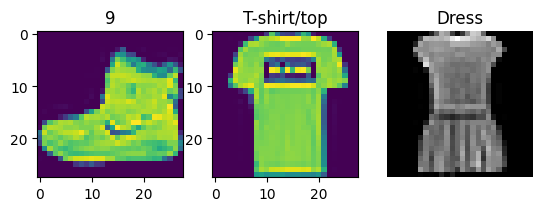

In [ ]:
import matplotlib.pyplot as plt
imag1, label1=train_data[0]
imag2, label2=train_data[1]
imag3, label3=train_data[3]

#plotting sample 0 of train data
plt.subplot(1,3,1)
plt.imshow(imag1.squeeze()) # using squeeze to remove extra dimension(since it is basically three dimensional)
plt.title(label1)

#plotting sample 1 of train data
plt.subplot(1,3,2)
plt.imshow(imag2.squeeze())
plt.title(class_names[label2])

#plotting sample 3 of train data
plt.subplot(1,3,3)
plt.imshow(imag3.squeeze(),cmap='gray')
plt.title(class_names[label3])
plt.axis(False)

**Data Loader:**

In [ ]:
# Using data loader:
from torch.utils.data import DataLoader
BATCH_SIZE=32

Train_batches=DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True) # DataLoader's output(here:Train_batches) consists of batches of data(here 60000/32). train_data = datasets.FashionMNIST(...)

Test_batches=DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=True)

Train_sample1image, Train_samplelabel1=next(iter(Train_batches)) #  'iter' works like a for Loop that iterate over the batches. 'next' function get the batch one by one. So by applying 'next' function one time we get the first batch,in second time we get second batch and so on. more explanation is in word file "Pytorch for deepNN".

print(Train_sample1image.shape)

print(len(Train_samplelabel1))

torch.Size([32, 1, 28, 28])
32


###**Building a Model-0**

In [ ]:
from torch import nn
#first we start with a linear model

class Fashion_Mnist(nn.Module):
  def __init__(self, input_features, hidden_neurons, output_features):
    super().__init__()
    self.stack_Layers=nn.Sequential(nn.Flatten(), nn.Linear(input_features,hidden_neurons),nn.Linear(hidden_neurons,output_features) )

  def forward(self,x):
    return self.stack_Layers(x)

In [ ]:
Input_Features=784
Hidden_Neurons=10
Output_Features=10

model_fashion0=Fashion_Mnist(Input_Features, Hidden_Neurons, Output_Features)

In [ ]:
# Optimizer and Loss function

loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some contexts

optimizer = torch.optim.SGD(params=model_fashion0.parameters(), lr=0.1)

### Creating a training loop and training a model on batches of data

In [ ]:
# accuracy function:
def acc_fn(output,target):
 correct = torch.eq(target, output).sum().item() # torch.eq() calculates where two tensors are equal
 acc = (correct / len(output)) * 100
 return acc

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
from timeit import default_timer as timer

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start= timer() #we will use Timer function to finally calculate the time spent for training

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 8

# Create training and testing loop
for epoch in tqdm(range(epochs)):
  Train_Loss=0
  print(f"epoch {epoch} : \n----------")
  for batch_idx, (X,y) in enumerate(Train_batches):
    model_fashion0.train()
    y_pred=model_fashion0(X)
    tr_loss=loss_fn(y_pred,y)
    Train_Loss+=tr_loss

    optimizer.zero_grad()
    tr_loss.backward()
    optimizer.step()

  Train_Loss /= len(Train_batches)

 #Testing:
  Test_Loss, Testaccuracy = 0, 0
  with torch.inference_mode():
    model_fashion0.eval()
    for batch_idxt, (X,y) in enumerate(Test_batches):
      y_predtest=model_fashion0(X)
      tstloss=loss_fn(y_predtest,y)
      Test_Loss+=tstloss
      y_predtestacc=torch.softmax(y_predtest,dim=1).argmax(dim=1)

      Test_acc=acc_fn(y_predtestacc,y)
      Testaccuracy+=Test_acc



    Test_Loss /= len(Test_batches) #They should be within "inference_mode" otherwise we get error
    Testaccuracy /= len(Test_batches)

  print(f"Train Loss is: {Train_Loss} | Test Loss is: {Test_Loss} | Test accuracy is: {Testaccuracy}")


train_time_end= timer()
training_time=train_time_end - train_time_start
print(f"Training time duration is :{training_time}")



  0%|          | 0/8 [00:00<?, ?it/s]

epoch 0 : 
----------
Train Loss is: 0.47585833072662354 | Test Loss is: 0.4814874827861786 | Test accuracy is: 83.12699680511182
epoch 1 : 
----------
Train Loss is: 0.4534832239151001 | Test Loss is: 0.5211654901504517 | Test accuracy is: 81.94888178913737
epoch 2 : 
----------
Train Loss is: 0.44245579838752747 | Test Loss is: 0.5127664804458618 | Test accuracy is: 82.94728434504792
epoch 3 : 
----------
Train Loss is: 0.43596792221069336 | Test Loss is: 0.46878618001937866 | Test accuracy is: 83.32667731629392
epoch 4 : 
----------
Train Loss is: 0.43047723174095154 | Test Loss is: 0.4646110534667969 | Test accuracy is: 83.71605431309904
epoch 5 : 
----------
Train Loss is: 0.4242740273475647 | Test Loss is: 0.5011433959007263 | Test accuracy is: 82.50798722044729
epoch 6 : 
----------
Train Loss is: 0.4236816465854645 | Test Loss is: 0.4703879654407501 | Test accuracy is: 83.47643769968052
epoch 7 : 
----------
Train Loss is: 0.42003118991851807 | Test Loss is: 0.487339049577713 |

### **Functionizing trainning and testing**

the functions goes through batches of data

In [ ]:
# functionizing the training loop for batches of data in one epoch

def train_step(model,Train_batches,loss_fn,optimizer,acc_fn):  #the way it is defined in the course: def train_step(model: torch.nn.Module,data_loader: torch.utils.data.DataLoader,loss_fn: torch.nn.Module,optimizer: torch.optim.Optimizer,accuracy_fn,):  >>>> in this way it defines the types of variables too

  Train_Loss, Trainaccuracy= 0, 0
  for batch_idx, (X,y) in enumerate(Train_batches):
    model.train()
    y_pred=model(X)
    tr_loss=loss_fn(y_pred,y)
    Train_Loss+=tr_loss

    optimizer.zero_grad()
    tr_loss.backward()
    optimizer.step()
    y_predtrainacc=torch.softmax(y_pred,dim=1).argmax(dim=1)
    Train_acc=acc_fn(y_predtrainacc,y)
    Trainaccuracy+=Train_acc

  Train_Loss /= len(Train_batches)
  Trainaccuracy /= len(Train_batches)
  return Train_Loss, Trainaccuracy


# functionizing the testing loop for batches of data in one epoch

def test_step(model,Test_batches,loss_fn,acc_fn):
  Test_Loss, Testaccuracy = 0, 0

  model.eval()
  with torch.inference_mode():
    for batch_idx, (X,y) in enumerate(Test_batches):
      y_predtest=model(X)
      tst_loss=loss_fn(y_predtest,y)
      Test_Loss+=tst_loss
      y_predtestacc=torch.softmax(y_predtest,dim=1).argmax(dim=1)
      Test_acc=acc_fn(y_predtestacc,y)
      Testaccuracy+=Test_acc

    Test_Loss /= len(Test_batches)
    Testaccuracy /= len(Test_batches)
    return Test_Loss, Testaccuracy


**Rerun the model with functions defined above**

In [ ]:
# Rerunning the model with those functions


from tqdm.auto import tqdm
from timeit import default_timer as timer


torch.manual_seed(42)
train_time_start= timer()


epochs = 8


for epoch in tqdm(range(epochs)):

  print(f"epoch {epoch} : \n----------")

  Train_Loss, Trainaccuracy=train_step(model=model_fashion0,Train_batches=Train_batches,loss_fn=loss_fn,optimizer=optimizer,acc_fn=acc_fn)


  Test_Loss, Testaccuracy=test_step(model=model_fashion0,Test_batches=Test_batches,loss_fn=loss_fn,acc_fn=acc_fn)




  print(f"Train Loss is: {Train_Loss} | Train accuracy is: {Trainaccuracy} | Test Loss is: {Test_Loss} | Test accuracy is: {Testaccuracy}")


train_time_end= timer()
training_time=train_time_end - train_time_start
print(f"Training time duration is :{training_time}")

# In Python, once you return a variable from a function, the variable itself is not accessible by its original name outside of that function unless it is explicitly returned and assigned to a variable in the calling scope

  0%|          | 0/8 [00:00<?, ?it/s]

epoch 0 : 
----------
Train Loss is: 0.40439656376838684 | Train accuracy is: 85.73 | Test Loss is: 0.45538511872291565 | Test accuracy is: 84.06549520766774
epoch 1 : 
----------
Train Loss is: 0.40229105949401855 | Train accuracy is: 85.805 | Test Loss is: 0.48205360770225525 | Test accuracy is: 83.16693290734824
epoch 2 : 
----------
Train Loss is: 0.4022565186023712 | Train accuracy is: 85.855 | Test Loss is: 0.5076719522476196 | Test accuracy is: 82.95726837060703
epoch 3 : 
----------
Train Loss is: 0.4015989303588867 | Train accuracy is: 85.87833333333333 | Test Loss is: 0.45923271775245667 | Test accuracy is: 83.4564696485623
epoch 4 : 
----------
Train Loss is: 0.4008944034576416 | Train accuracy is: 85.85833333333333 | Test Loss is: 0.45962026715278625 | Test accuracy is: 83.92571884984025
epoch 5 : 
----------
Train Loss is: 0.3983157277107239 | Train accuracy is: 86.00833333333334 | Test Loss is: 0.5174314975738525 | Test accuracy is: 82.3682108626198
epoch 6 : 
----------


### **Building a model-1 (CNN model)**

In [ ]:
class fashion_Cnn(nn.Module):
  def __init__(self,input_shape:int,hidden_neurons:int,output_shape:int):
    super().__init__()
    self.block_1=nn.Sequential(nn.Conv2d(in_channels=input_shape, out_channels=hidden_neurons, kernel_size=3,stride=1, padding=1),nn.ReLU(),
                               nn.Conv2d(in_channels=hidden_neurons, out_channels=hidden_neurons, kernel_size=3,stride=1, padding=1),nn.ReLU(),
                               nn.MaxPool2d(kernel_size=2,
                         stride=2))

    self.block_2=nn.Sequential(nn.Conv2d(in_channels=hidden_neurons, out_channels=hidden_neurons, kernel_size=3,stride=1, padding=1),nn.ReLU(),
                               nn.Conv2d(hidden_neurons, hidden_neurons, kernel_size=3,stride=1, padding=1), nn.ReLU(),
                               nn.MaxPool2d(kernel_size=2,
                         stride=2),
                               )

    self.classifier = nn.Sequential(nn.Flatten(),nn.Linear(in_features=hidden_neurons*7*7 ,out_features=output_shape))
# to calculate inputshape for nn.Linear :one way is to calculate data shape step by step from begining till the output of nn.Maxpool of block2. another tricky way is to create a dummy input data and feed it into network while commenting out the self classifier, and then print the shape of block_2 output. in this way we obtain the shape sth like this (hidden_neurons,7,7). So, after flatting the input shape becomes hidden_neurons*7*7.
  def forward(self,x):
    x=self.block_1(x)
    x=self.block_2(x)
    x=self.classifier(x)
    return x

In [ ]:

out=torch.flatten(output)
print(out.shape)
Lin=nn.Linear(490,10)
out2=Lin(out)
print(out2.shape)

torch.Size([490])
torch.Size([10])


In [ ]:
model_fashion1=fashion_Cnn(input_shape=1,hidden_neurons=10,output_shape=10)

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_fashion1.parameters(),lr=.01)

In [ ]:
from tqdm.auto import tqdm

Epochs=10

for epoch in tqdm(range(Epochs)):
  print(f"epoch {epoch} : \n----------")

  Train_Loss, Trainaccuracy=train_step(model=model_fashion1,Train_batches=Train_batches,loss_fn=loss_fn,optimizer=optimizer,acc_fn=acc_fn)


  Test_Loss, Testaccuracy=test_step(model=model_fashion1,Test_batches=Test_batches,loss_fn=loss_fn,acc_fn=acc_fn)




  print(f"Train Loss is: {Train_Loss} | Train accuracy is: {Trainaccuracy} | Test Loss is: {Test_Loss} | Test accuracy is: {Testaccuracy}")


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 0 : 
----------
Train Loss is: 1.2821309566497803 | Train accuracy is: 52.41166666666667 | Test Loss is: 0.6090866923332214 | Test accuracy is: 78.3047124600639
epoch 1 : 
----------
Train Loss is: 0.5222025513648987 | Train accuracy is: 81.00166666666667 | Test Loss is: 0.4646032154560089 | Test accuracy is: 83.58626198083067
epoch 2 : 
----------
Train Loss is: 0.4391993284225464 | Train accuracy is: 84.13833333333334 | Test Loss is: 0.4345841705799103 | Test accuracy is: 84.53474440894568
epoch 3 : 
----------
Train Loss is: 0.3997292220592499 | Train accuracy is: 85.65833333333333 | Test Loss is: 0.39744266867637634 | Test accuracy is: 86.2120607028754
epoch 4 : 
----------
Train Loss is: 0.37377870082855225 | Train accuracy is: 86.71 | Test Loss is: 0.41221320629119873 | Test accuracy is: 84.96405750798722
epoch 5 : 
----------
Train Loss is: 0.356720507144928 | Train accuracy is: 87.20833333333333 | Test Loss is: 0.3710820972919464 | Test accuracy is: 87.25039936102236
epoc

###**Prediction**

In [ ]:
#Initialization: (Loading Model Parameters)

import torch
from torch import nn
from google.colab import drive
drive.mount('/content/drive')

# After running the model Structure (running  the Cell containing the model structure) --- re-training is not needed

model_fashion1.load_state_dict(torch.load('/content/drive/My Drive/Colab_Notebooks/Pytorch-full-from-youtube-course/03CNN_model_parameters.pth')
)
model_fashion1.eval()


Mounted at /content/drive


fashion_Cnn(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
#Defining the predict function

def pred_fn(Model:torch.nn.Module, data):
  pred_labels=[]
  for sample in data:
    pred_labels.append(torch.softmax(Model(torch.unsqueeze(sample,dim=0)),dim=1).argmax(dim=1))
  return pred_labels

###Doing prediction and visualizing the results

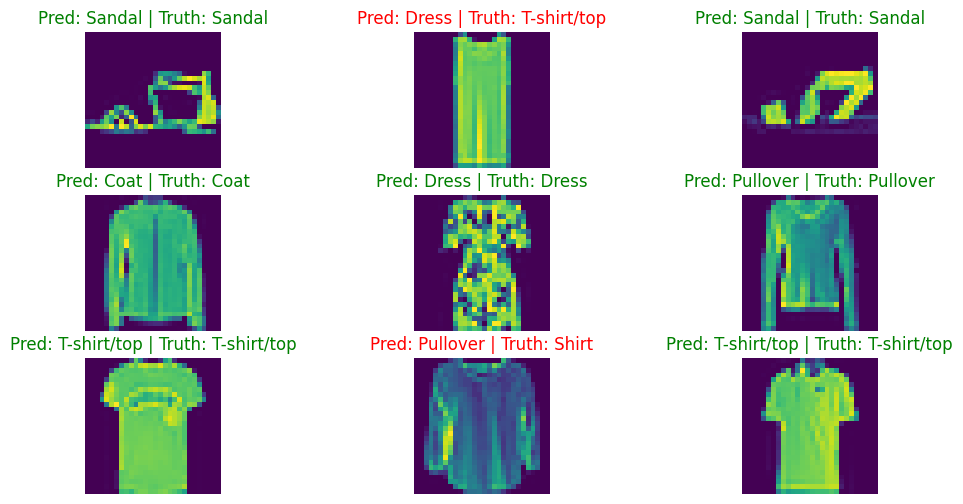

In [ ]:
#Plotting and comparing the results

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

with torch.inference_mode():

 output=pred_fn(model_fashion1,test_sample)

for i, sample in enumerate(test_sample): # enumerate gives us both the index and data
  plt.subplot(3,3,i+1)
  plt.imshow(sample.squeeze())

  predicted_label=class_names[output[i].item()]
  truth_label=class_names[test_label[i]]
  text_title= f"Pred: {predicted_label} | Truth: {truth_label}"
  if predicted_label==truth_label: # if prediction is wrong the title would be in red color
    plt.title(text_title,c="g")
  else:
    plt.title(text_title,c="r")
  plt.axis(False)


###Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Obtaining predicted labels for whole test_data
#This code is adopted from for loop of test_step function

with torch.inference_mode():
  y_pred_labels=[]
  truth_values=[]

  for batch_idx, (X,y) in enumerate(Test_batches):

    y_predtest=model_fashion1(X)

    y_predtestacc=torch.softmax(y_predtest,dim=1).argmax(dim=1)

    y_pred_labels.append(y_predtestacc)
    truth_values.append(y)


  y_pred_labels_tensor=torch.cat(y_pred_labels) #Each element of y_pred_labels is a tensor containing the predicted labels,so we use the cat function to concatenate a list of tensors (y_pred_labels) into a single tensor (y_pred_labels_tensor)
  truth_values_tensor=torch.cat(truth_values)


In [ ]:
#Building Confusion Matrix

cm = confusion_matrix(truth_values_tensor.numpy(), y_pred_labels_tensor.numpy())

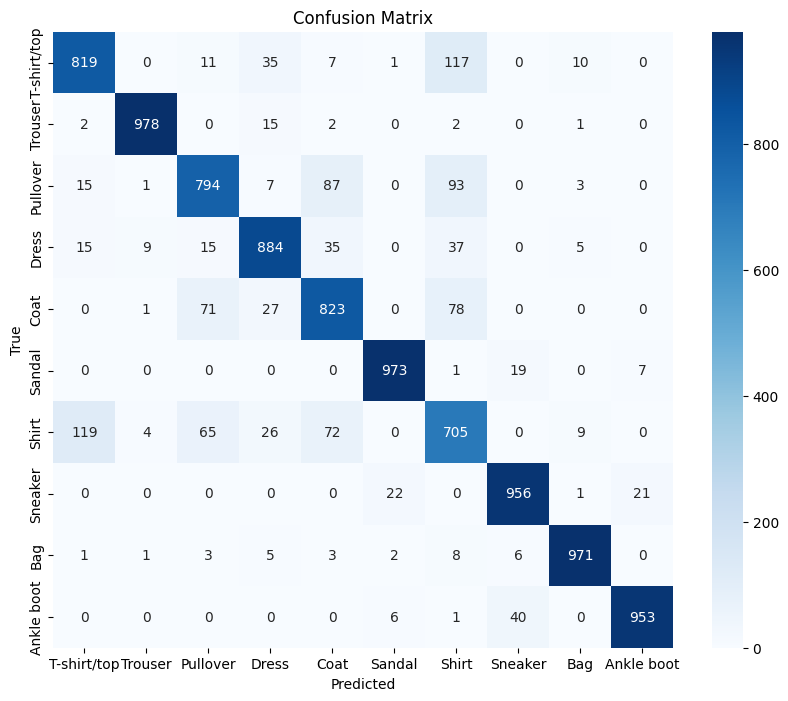

In [ ]:
#Plotting Confusion Matrix

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()